# Edge Detection

## Will Koehrsen wjk68

There are two main methods for edge detection: [Canny](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html) and [Sobel](http://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm). We can implement both of these easily in openCV. 

## Canny Edge Detection

Canny edge detection using the [following steps](https://en.wikipedia.org/wiki/Canny_edge_detector)

1. Apply a Gaussian filter to remove the noise and smooth the image
2. Calculate image intensity gradients, that is, the changes in pixel intensity across the image.
3. Use non-maximum suppression to get rid of spurious results. This removes pixels that are not a local maximum in the direction of the gradient. This step results in thin edges because thick edges will have pixels in the middle which are not local maximums and are thus suppressed. 
4. Apply a double threshold to the intensity gradients to determine potential edges. Any values above the higher threshold are considered edges, while those below the lower threshold are considered not edges. Pixels with values between the two thresholds are judged based on their connectivity to sure-edges. If the pixels in between the thresholds are connected to sure-edges, they are also considered to be edges. This step removes pixel noise because it assumes edges are long lines and the final result is strong edges. 


The Canny function in open cv implements edge detection using 2 parameters:  The  min value for the threshold, and and the max value for the threshold. We simply have to load in the image and then pass it to the Canny function. We will then plot the results in gray scale. 

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def detect_edges_canny(image_path, th1 = 100, th2 = 200):

    # Load image
    img = cv2.imread(image_path)
    
    # Detect edges
    edges = cv2.Canny(img, threshold1= th1, threshold2 = th2)

    # Plot original and edge image
    plt.figure(figsize=(10, 8))
    plt.subplot(121); plt.imshow(img, cmap='gray')
    plt.title('Original Image'); plt.axis('off');
    plt.subplot(122); plt.imshow(edges, cmap='gray')
    plt.title('Image with Edges'); plt.axis('off')
    plt.show();

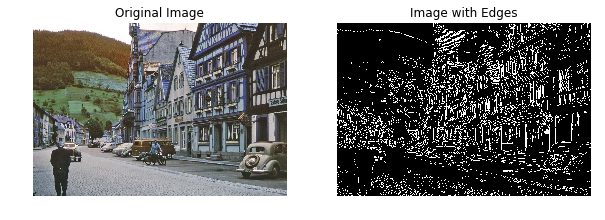

In [3]:
detect_edges_canny('images/german_street.jpg', th1 = 100, th2 = 200)

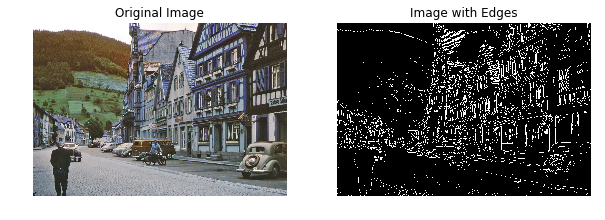

In [4]:
detect_edges_canny('images/german_street.jpg', th1= 200, th2 = 250)

Raising both thresholds reduces the number of edges detected because the pixel gradient intensity must be greater to classify as a sure-edge. This parameter can be fine-tuned to achieve a better result for specific images. 

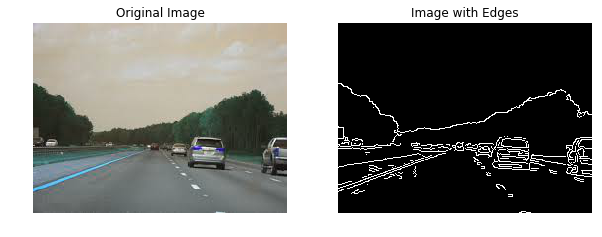

In [5]:
detect_edges_canny('images/road_scene.jpg', th1 = 100, th2 = 200)

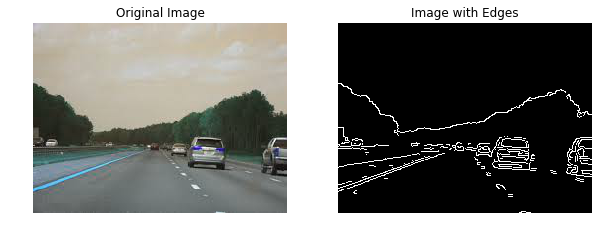

In [6]:
detect_edges_canny('images/road_scene.jpg', th1 = 150, th2 = 250)

Altering the threshold in this image does not significantly change the results because there is little noise in the image in the first place. Most of the detected edges in the first run are already "strong edges" and are also present in the second run. Some of th noise is reduced though, again showing the purpose of the double thresholding. 

## Sobel Edge Detection

We can also use CV2 for Sobel Edge Detection. Sobel Edge detection relies on convolution kernels that are 90 degree rotations of each other. The goal of these kernels is to find gradients in the x and y direction. The x-direction gradient detection kernel is

`[[-1, 0, +1],
  [-2, 0, +2],
  [-1, 0, +1]]
`

and the y-direction gradient detection kernel is:

`[[+1, +2, +1],
  [0,   0,  0],
  [-1, -2, -1]]
`

The two response from these kernels can then be combined to yield all the vertical and perpendicular edges in an image. In this implementation we will show the individual results and the results from combining the two outputs using a bitwise or operation. The or operation says a pixel is an edge if it detected as an edge in either the x or y gradient direction.

In [7]:
def detect_edges_sobel(image_path):

    # Load image
    img = cv2.imread(image_path)
    
    img_binary = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    edgeX = cv2.Sobel(img_binary, cv2.CV_16S, 0, 1)
    edgeY = cv2.Sobel(img_binary, cv2.CV_16S, 1, 0)
    
    
    # Detect edges
    edgeX = np.uint8(np.absolute(edgeX))
    edgeY = np.uint8(np.absolute(edgeY))
    edge = cv2.bitwise_or(edgeX, edgeY)
    
    plt.figure(figsize=(10, 8))
    plt.subplot(121); plt.imshow(edgeX, cmap='gray')
    plt.title('X Edges'); plt.axis('off');
    plt.subplot(122); plt.imshow(edgeY, cmap='gray')
    plt.title('Y Edges'); plt.axis('off')

    # Plot original and edge image
    plt.figure(figsize=(10, 8))
    plt.subplot(121); plt.imshow(img)
    plt.title('Original Image'); plt.axis('off');
    plt.subplot(122); plt.imshow(edge, cmap='gray')
    plt.title('Image with Edges'); plt.axis('off')
    plt.show();

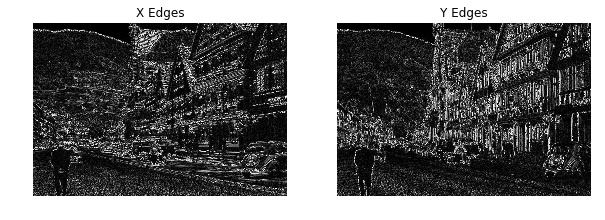

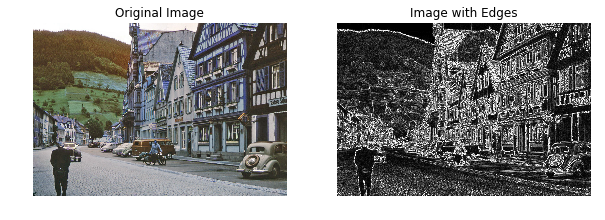

In [8]:
detect_edges_sobel('images/german_street.jpg')

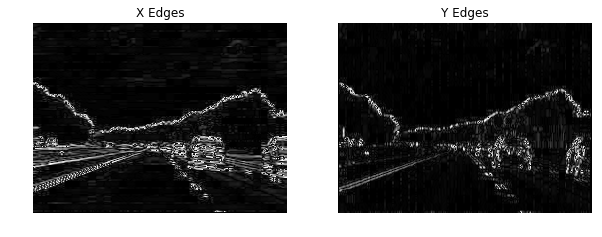

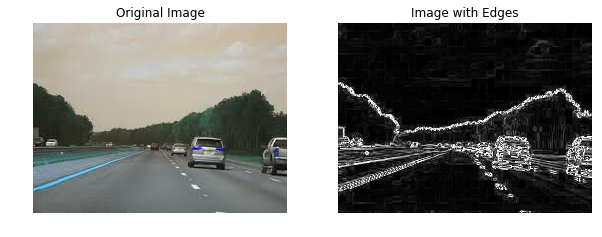

In [9]:
detect_edges_sobel('images/road_scene.jpg')

The X edges are the results of finding the gradients in the Y direction and the Y edges are the results of finding the gradient in the X direction. We can see this difference in the results.

## Conclusions

In this notebook we saw how there are multiple methods for implementing edge detection, which can be done easily in openCV, or with a little more effort by hand. Overall, the Canny approach provides much better results because it is effectively a Sobel edge detector with both pre and post processing operations. Canny edge detection first removes noise and detail from the image using a Gaussian kernel, calculates the gradients, and then applies a double threshold in a hysteresis process to identify strong edges. Sobel simply applies the gradients in the x and y direction to find the pixels where the light value is changing most rapidly. Canny is clearly the better approach in this implementation.